## Multivariate Reduction Practice

Lets continue our discussion with multivariate data reduction. We will focus on dimensionality reduction mainly on principal component analysis. The questions are partially complete. You may have to debug/modify/complete the code to generate the desired output. 

**Load the data** into movies_data dataframe.

In [7]:
movies_data <- read.csv("../../../datasets/movies/movie_metadata.csv", header = T, sep=",")
head(movies_data)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,,,,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


Remove the rows that contain any NA values.

In [8]:
#count number of rows in the dataset
nrow(movies_data)
#Omit rows from  the dataset that contain NA values
movies_data=na.omit(movies_data)
#count number of rows again in the dataset
nrow(movies_data)

#Form a new dataframe called less_data excluding all rows from movies_data that contain NA values 
less_data=movies_data[!sapply(movies_data,class) %in% c("factor")]

[1] 5043

[1] 3801

In [9]:
cor(less_data)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.00000000,0.22770510,0.17691581,0.25508576,0.17019757,0.46853499,0.59498973,0.24100544,-0.03400866,0.56679514,0.10568105,0.41038049,0.25583672,0.34388077,0.18064082,0.70396936
duration,0.22770510,1.00000000,0.17973400,0.12577123,0.08471988,0.24474304,0.33803814,0.12117142,0.02909973,0.35039147,0.06816122,-0.12942203,0.12945227,0.36612369,0.15311429,0.21493610
director_facebook_likes,0.17691581,0.17973400,1.00000000,0.11824025,0.09073261,0.13993814,0.30061915,0.11974122,-0.04761895,0.21831138,0.01855931,-0.04460636,0.11690032,0.19083814,0.03787106,0.16273728
actor_3_facebook_likes,0.25508576,0.12577123,0.11824025,1.00000000,0.25372024,0.30158391,0.26945536,0.49068631,0.10501768,0.20732096,0.04047813,0.11553537,0.55418237,0.06497354,0.04712336,0.27251268
actor_1_facebook_likes,0.17019757,0.08471988,0.09073261,0.25372024,1.00000000,0.14704475,0.18226526,0.94492526,0.05757968,0.12522139,0.01708638,0.09374233,0.39267587,0.09313142,0.05760375,0.13177824
gross,0.46853499,0.24474304,0.13993814,0.30158391,0.14704475,1.00000000,0.62694784,0.23868703,-0.03225370,0.54710674,0.10038914,0.05236800,0.25465945,0.21212439,0.06526004,0.36849402
num_voted_users,0.59498973,0.33803814,0.30061915,0.26945536,0.18226526,0.62694784,1.00000000,0.25194009,-0.03202642,0.77992455,0.06682395,0.02193838,0.24666028,0.47791732,0.08548456,0.51869065
cast_total_facebook_likes,0.24100544,0.12117142,0.11974122,0.49068631,0.94492526,0.23868703,0.25194009,1.00000000,0.08098495,0.18228784,0.02942336,0.12401462,0.64401612,0.10625870,0.06967465,0.20706080
facenumber_in_poster,-0.03400866,0.02909973,-0.04761895,0.10501768,0.05757968,-0.03225370,-0.03202642,0.08098495,1.00000000,-0.07940360,-0.02175723,0.06795245,0.07413806,-0.06429247,0.01662043,0.01433235
num_user_for_reviews,0.56679514,0.35039147,0.21831138,0.20732096,0.12522139,0.54710674,0.77992455,0.18228784,-0.07940360,1.00000000,0.07125387,0.01759409,0.18958182,0.32252237,0.09855669,0.37197029


#### Correlation Plot

__Reference__: https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html

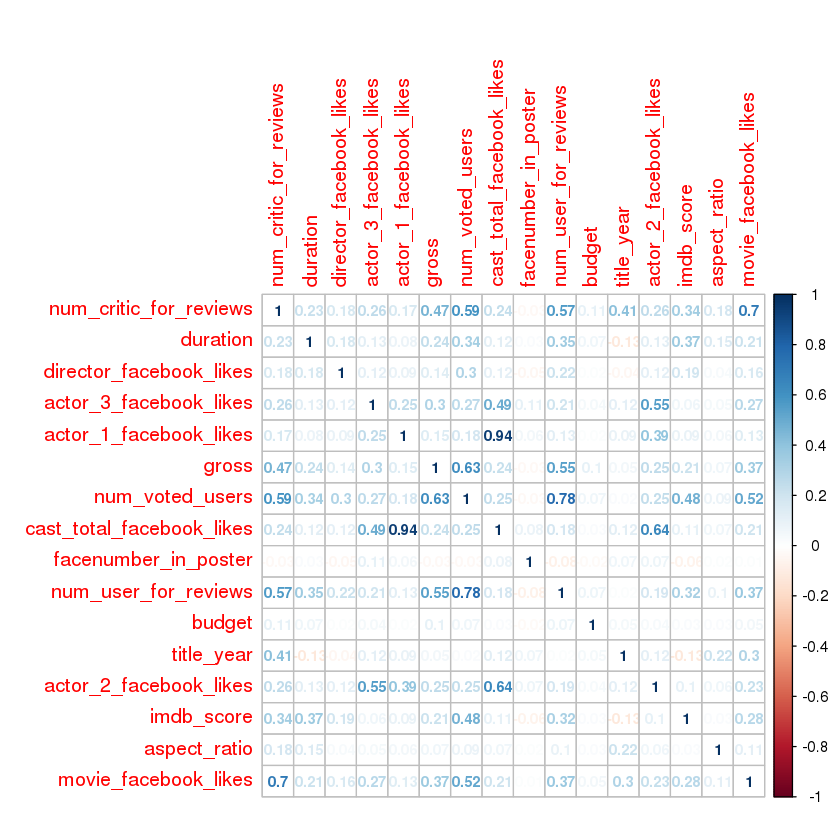

In [10]:
# install.packages('corrplot',repos='http://cran.us.r-project.org')
library('corrplot') #package corrplot
cors <- cor(less_data) # get the correlations for less_data
#The output of the function cor() is the correlation coefficients between each and every variable combination in the dataset. 
#correlation to itself is always 1.

corrplot(cors, method = "number",number.cex=0.75) #plot the correlation of variables in the form of a matrix
# method takes different inputs like "number", "circle", "ellipse" etc. We chose number here, as we want to see correlation 
#between each variable.

Variables movie_facebook_likes, num_user_for_reviews, num_voted_users, num_critic_for_reviews and duration are the relatively most correlated with imdb_score. 

* The "cast_total_facebook_likes" has a strong positive correlation with the "actor_1_facebook_likes", and has smaller positive correlation with both "actor_2_facebook_likes" and "actor_3_facebook_likes"

* The "movie_facebook_likes" has strong correlation with "num_critic_for_reviews", meaning that the popularity of a movie in social network can be largely affected by the critics

* The "movie_facebook_likes" has decent amount of correlation with the "num_voted_users"

* The movie "gross" has strong positive correlation with the "num_voted_users"

##### Contradicting correlations
---------------------------

* The "imdb_score" has very small positive correlation with "director_facebook_likes". So we cant guarantee a popular director's movie will be great.

* The "imdb_score" has very small positive correlation with the "actor_1_facebook_likes". Just like a famous director, we cant guarantee a popular actor's movie will be great.

* The "imdb_score" has a small but positive correlation with "duration". Highly rated movies tend to be longer in duration.

* The variables num_voted_users, num_user_for_reviews have small positive correlation. May be more reviews are made on good movies.

* The "imdb_score" has almost no correlation with "budget". Big budget movies will not necessarily turn out great

**Question 1.a: **Use the information.gain function in FSelector package to find the information again for all variables in movies_data dataset. 

**Question 1.b: **Identify the variables which have an information gain of 0.7

### Feature Selection

In [12]:
# # install.packages("FSelector",repo="http://cran.uk.r-project.org")
library(FSelector)
weight_gains <- information.gain(duration~., movies_data)

print(weight_gains)

subset <- cutoff.k(weight_gains, 6)

formula <- as.simple.formula(subset, "Prices")

print(formula)

                          attr_importance
color                         0.002694247
director_name                 1.022372768
num_critic_for_reviews        0.031134796
director_facebook_likes       0.091589027
actor_3_facebook_likes        0.011985811
actor_2_name                  1.126057554
actor_1_facebook_likes        0.028123707
gross                         0.033084770
genres                        0.536439715
actor_1_name                  0.792247364
movie_title                   1.607111803
num_voted_users               0.066088229
cast_total_facebook_likes     0.027056667
actor_3_name                  1.275435292
facenumber_in_poster          0.006383478
plot_keywords                 1.601142827
movie_imdb_link               1.607476522
num_user_for_reviews          0.064985591
language                      0.024180729
country                       0.026865839
content_rating                0.027411424
budget                        0.057514140
title_year                    0.00

From information gain function, 
````
        Answer for 1.b
        "Write the variable names identified here"
````

variables have information gain of over 0.77. 

But we see completely different set of variables movie_facebook_likes, num_user_for_reviews, num_voted_users, num_critic_for_reviews and duration as the most correlated from cor() function.

Lets continue our discussion with PCA. As we have seen in lab notebook we have to standardize the variables. 

**Question 2: ** Use scale() function to standardize the numeric variables in movies_data and assign the new data to a variable called standard_vars.

In [14]:
standard_vars <- as.data.frame(scale(less_data))
dim(standard_vars)
head(standard_vars)

[1] 3801   16

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,4.508980,2.9879271,-0.26174734,0.04838772,-0.4319618,10.1040151,5.1583530,-0.34552775,-0.6717869,6.6344079,0.8505943,0.6029682,-0.2358878,1.3558130,-0.9370201,1.1113488
2,1.101861,2.5912537,-0.07721951,0.12533641,2.0926134,3.6707931,2.4193120,1.93928121,-0.6717869,2.2056624,1.1309436,0.4020317,0.6623369,0.5994134,0.6806695,-0.4336351
3,3.529737,1.6656825,-0.26174734,-0.31990466,0.2153651,2.1116236,1.1299198,0.01497179,-0.1846709,1.6106106,0.8861942,1.2057778,-0.3559016,0.3157635,0.6806695,3.5458687
4,5.237343,2.3708796,6.94893180,11.80031079,1.2510883,5.6491903,6.8621219,5.00604761,-0.6717869,5.7735339,0.9084441,0.9043730,4.6406941,1.9231127,0.6806695,7.2444664
6,2.396728,0.9604855,-0.10606222,-0.12408350,-0.4552656,0.3002385,0.7097149,-0.50099515,-0.1846709,0.9862941,0.9694090,0.9043730,-0.3030778,0.1266636,0.6806695,0.6899895
7,1.830224,2.0182811,-0.26174734,1.71737837,1.0568902,4.0576428,1.8373985,1.81878216,-0.6717869,3.8249834,0.9440440,0.4020317,1.9884560,-0.2515362,0.6806695,-0.4336351


**Question 3: ** Run prcomp() function on standard_vars created above and assign the result to movies_data_pca 

In [15]:
# Compute the Principal Components. Run prcomp() function on standardardized variables created above.
movies_data_pca <- prcomp(standard_vars)

**If you go to the help page for `prcomp` you will find,**

`The calculation is done by a singular value decomposition of the (centered and scaled which is what we are doing above standardizing the variables) data matrix, not by using eigen on the covariance matrix. This is generally the preferred method for numerical accuracy.`

For `princomp()` you will see,

`The calculation is done using eigen on the correlation or covariance matrix, as determined by cor. This is done for compatibility with the S-PLUS result. A preferred method of calculation is to use svd on x, as is done in prcomp."`

In [16]:
summary(movies_data_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1085 1.4616 1.22342 1.02521 1.00690 0.99790 0.93972
Proportion of Variance 0.2779 0.1335 0.09355 0.06569 0.06337 0.06224 0.05519
Cumulative Proportion  0.2779 0.4114 0.50493 0.57063 0.63399 0.69623 0.75142
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     0.93055 0.88380 0.76887 0.69505 0.6657 0.64476 0.49547
Proportion of Variance 0.05412 0.04882 0.03695 0.03019 0.0277 0.02598 0.01534
Cumulative Proportion  0.80554 0.85436 0.89131 0.92150 0.9492 0.97518 0.99052
                          PC15    PC16
Standard deviation     0.38708 0.04209
Proportion of Variance 0.00936 0.00011
Cumulative Proportion  0.99989 1.00000

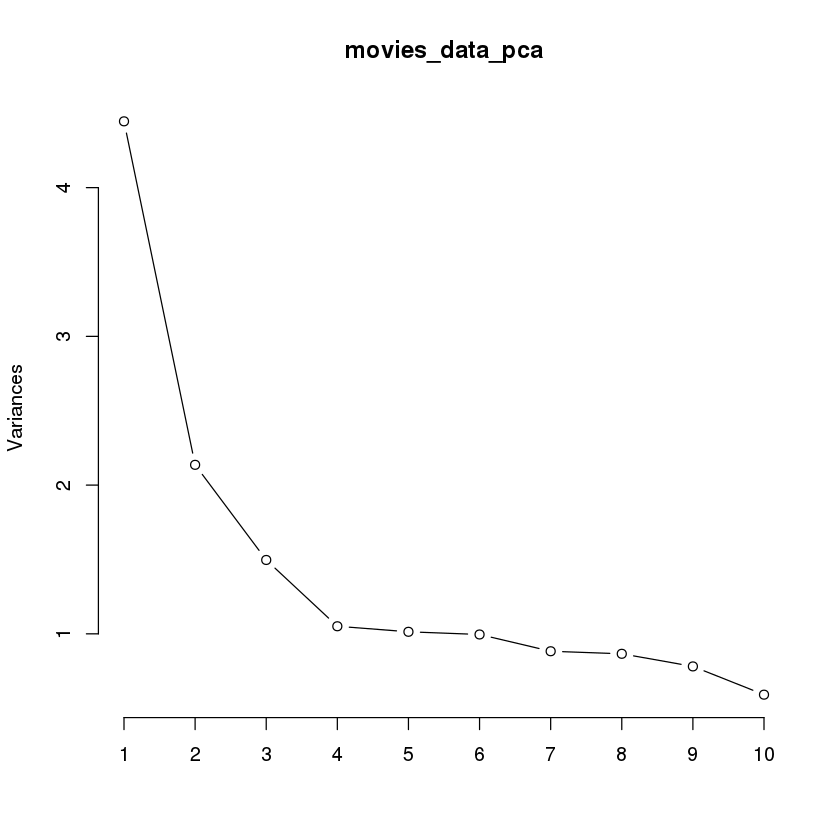

In [17]:
screeplot(movies_data_pca, type="lines")

**Question 4: **What are your observations from the plot. Write a few words below. 

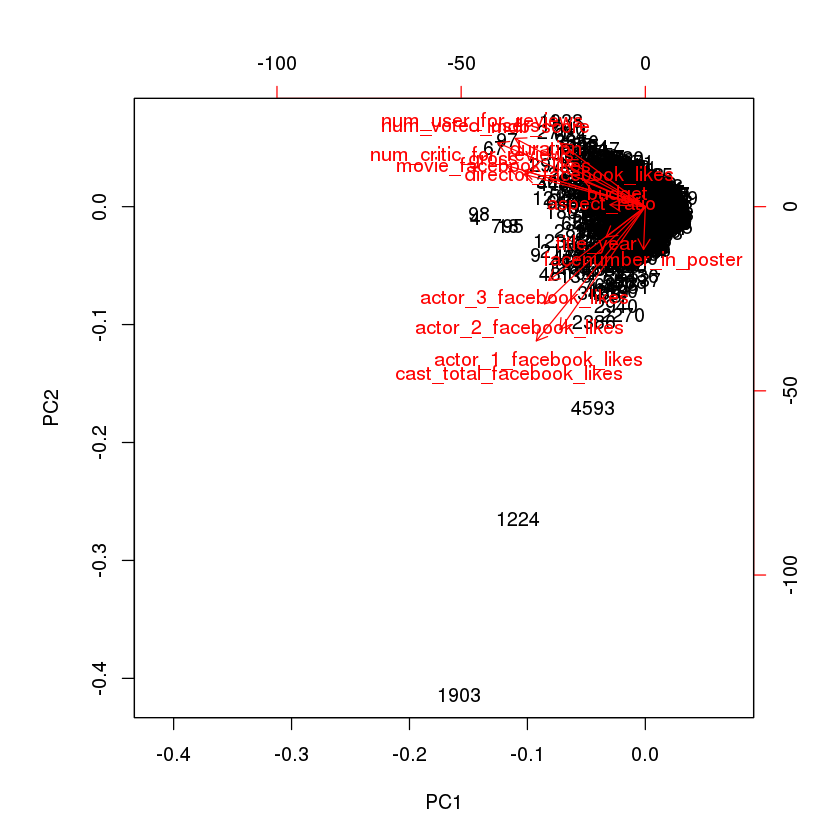

In [18]:
biplot(movies_data_pca) 

````

        Answer for question 4 goes here

````

Look at the dimensions of the PCA we ran. We are interested in the x part of crime_train_data_pca for the dimensions.

In [24]:
head(movies_data_pca$x)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
1,-10.096706,6.49255845,0.2075710,3.39014721,-1.1894673,-1.6131224,-2.8989967,-2.9299282,3.67341778,1.65678028,-1.5074389,-3.15974623,0.8290876,-1.32665100,-0.5570756,0.065163598
2,-5.157159,0.24379510,1.2687542,-0.22853782,1.2457871,-1.2665726,-1.7371184,-1.2801480,1.70062864,1.22204982,-0.9893384,-1.40117069,0.1855105,0.05704376,0.3587313,-0.005796855
3,-4.546363,2.34157005,-2.5061380,-0.02700993,0.2959316,-0.3636236,-1.0923949,0.6568998,-0.09404591,1.47219335,1.4060411,-0.20441662,0.4402425,-0.74408659,-0.3067854,0.044161736
4,-18.720669,-0.90279792,0.4080997,2.65829367,-2.3578745,-0.3589669,6.9112458,-2.1761418,-1.63374664,-0.08236554,2.1137268,0.05634748,-3.8332700,0.63728797,-0.4658338,-0.810461474
6,-1.857326,1.68903855,-1.5916768,-0.37494918,0.4341147,-0.6946670,-0.2534768,0.1647287,-0.14210171,0.55526884,-0.2441908,0.47739431,-0.1029903,-0.97659436,0.4870093,0.029964088
7,-6.008971,-0.03027604,0.5944396,0.88178169,0.2433510,-1.5716939,-0.9467750,-2.9197705,1.34232630,1.09212046,-1.4180065,-0.34154030,0.2079198,-0.90670818,-0.5619612,-0.127431374


**Question 5: ** Fit a multiple regression model to predict imdb_score in movies_data using the first 4 principal components created above. 

In [22]:
#movies_data_pca$x is a list that contains all the principal components. You can access components using subscripts 1,2,3..so on
fit = lm(movies_data$imdb_score~movies_data_pca$x[,1]+movies_data_pca$x[,2]+movies_data_pca$x[,3]+movies_data_pca$x[,4])
summary(fit)


Call:
lm(formula = movies_data$imdb_score ~ movies_data_pca$x[, 1] + 
    movies_data_pca$x[, 2] + movies_data_pca$x[, 3] + movies_data_pca$x[, 
    4])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6547 -0.4121  0.0727  0.5194  2.0506 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.466035   0.012208  529.66   <2e-16 ***
movies_data_pca$x[, 1] -0.234907   0.005791  -40.57   <2e-16 ***
movies_data_pca$x[, 2]  0.252552   0.008353   30.23   <2e-16 ***
movies_data_pca$x[, 3]  0.288003   0.009980   28.86   <2e-16 ***
movies_data_pca$x[, 4] -0.211451   0.011909  -17.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7526 on 3796 degrees of freedom
Multiple R-squared:  0.4941,	Adjusted R-squared:  0.4936 
F-statistic:   927 on 4 and 3796 DF,  p-value: < 2.2e-16


**Question 6: ** Plot a ggplot for principal components 1 and 2.

#### Scatter plots of Principal components

In [ ]:
library(ggplot2)
pca_comp1_comp2 <- ggplot(<what goes in here>, aes(x=<what goes in here>,y=<what goes in here>))

pca_comp1_comp2+geom_point(alpha = 0.8)

Lets try to fit a linear multiple regression model using the most correlated variables we found.

**Question 7.a: ** Fit a multiple regression model to predict movies_data using variables movie_facebook_likes+ num_user_for_reviews+ num_voted_users+ num_critic_for_reviews+ duration

In [ ]:
fit1=lm(<what goes in here>~<what goes in here>+ <what goes in here>+ <what goes in here>+ <what goes in here>+ <what goes in here>,
       data=movies_data)
summary(fit1)

**Question 7.b: ** Compare the $R^2$ value for models fit1 and fit. Write your opinion about the models in a line.

````

        Answer for question 7.b goes here

````

**Question 8: ** Build a model to predict imdb_score using all the independent features of movies_data.

In [ ]:
fit2=lm(imdb_score~ <what goes in here>, data=less_data)
summary(fit2)

This looks really significant when you compare the $R^2$ of model built using all 16 numeric variables in the dataset compared to model built using principal components. 

**Question 9: ** Run factanal() function to generate 2 factors for less_data.  

In [ ]:
factors <- factanal(less_data, <what goes in here>, rotation=<what goes in here>)
print(factors, digits=2, cutoff=0.3, sort=TRUE)

Reference: [Factor Analysis](http://www.statpower.net/Content/312/R%20Stuff/Exploratory%20Factor%20Analysis%20with%20R.pdf)

# SAVE YOUR NOTEBOOK

In [ ]:
# Add code here to save your work in to the version control
# Hint: The file name is "Practice_Multivariate_Reduction.ipynb"

